# Neural Networks for Handwritten Digit Recognition (Multiclass - 0 to 9)

- Build a deep learning model using TensorFlow and Keras to recognize handwritten digits (0-9) from the MNIST dataset.

- Train the model, visualize learning curves, evaluate its performance, and predict unseen images.

Tech Stack:

- Python

- TensorFlow / Keras

- Scikit-learn

- Matplotlib

- NumPy

Problem Type:

- Multiclass Classification (10 classes: 0, 1, 2, ..., 9)

## Import Libraries

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

## Load the MNIST Dataset

- MNIST dataset: 70,000 images of handwritten digits.

- Each image is 28x28 pixels, flattened into 784 features.

- X = pixel values, y = corresponding digit (0-9).

In [20]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
# Load the MNIST dataset (real handwritten digits dataset)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

## Data Preprocessing

- Normalization: Scale pixel values to [0, 1] range.

- Type conversion: Make sure y values are integers for classification.

In [22]:
# Preprocessing
X = X / 255.0  # Normalize pixel values to 0-1
y = y.astype(np.int32)  # Ensure y is integers (0-9)

## Split Data into Train, Validation, and Test Sets

- Training set: 64% of data

- Validation set: 16% of data

- Testing set: 20% of data

We train the model on training data and validate on validation data.

In [23]:
# Split into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Further split training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

## Build the Neural Network Model

- Input layer: 784 neurons (one for each pixel)

- Hidden layers:

    128 neurons (ReLU activation)

    64 neurons (ReLU activation)

- Output layer:

    10 neurons (Softmax activation for 10 classes: 0-9)

Softmax gives the probability for each class.

In [25]:
# Build the Neural Network model
model = models.Sequential([
    layers.Input(shape=(784,)),            # 28x28 flattened into 784
    layers.Dense(128, activation='relu'),   # 1st hidden layer
    layers.Dense(64, activation='relu'),    # 2nd hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (0-9)
])

## Compile the Model

- Optimizer: Adam — adjusts learning rate automatically.

- Loss: Sparse Categorical Crossentropy (for multiclass classification with integer labels).

- Metrics: Accuracy (how many predictions were correct).

In [26]:
# Compile the model
model.compile(
    optimizer='adam',                         # Adam optimizer
    loss='sparse_categorical_crossentropy',   # Suitable for integer labels in multiclass
    metrics=['accuracy']                      # Track accuracy during training
)

## Show Model Summary

In [27]:
# Show model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

- X_train, y_train: data to train

- epochs=20: go through entire dataset 20 times

- batch_size=32: updates weights after every 32 examples

- Validation data is checked at end of each epoch.

In [28]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    batch_size=32
)

Epoch 1/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8514 - loss: 0.4983 - val_accuracy: 0.9516 - val_loss: 0.1582
Epoch 2/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1284 - val_accuracy: 0.9622 - val_loss: 0.1198
Epoch 3/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.0867 - val_accuracy: 0.9673 - val_loss: 0.1053
Epoch 4/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9813 - loss: 0.0625 - val_accuracy: 0.9689 - val_loss: 0.1112
Epoch 5/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9863 - loss: 0.0458 - val_accuracy: 0.9688 - val_loss: 0.1094
Epoch 6/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9692 - val_loss: 0.1184
Epoch 7/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0299 - val_accuracy: 0.9727 - val_loss: 0.1128
Epoch 8/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0257 - 

## Plot Training and Validation Graphs

- Loss vs Epochs: how well the model is minimizing error.

- Accuracy vs Epochs: how accurately the model is predicting.

2 subplots show Training and Validation curves together.

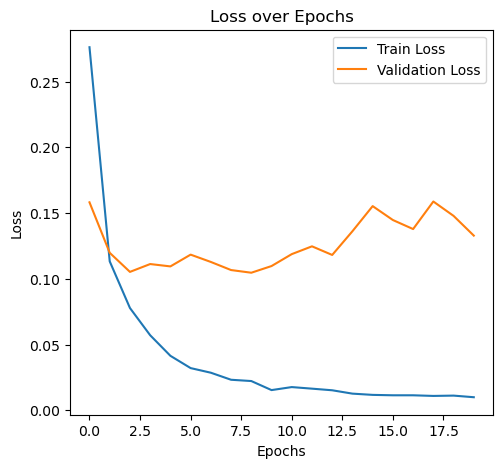

In [29]:
# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

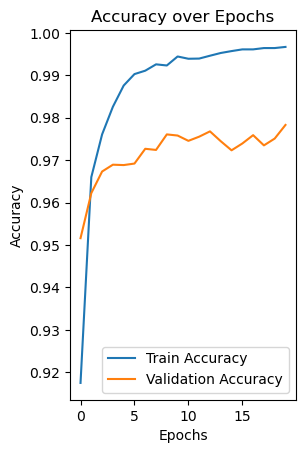

In [30]:
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluate on Test Data

Evaluates final test loss and test accuracy on unseen data.

In [31]:
# Evaluate the model on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\n Test Loss:", round(test_loss, 4))
print("Test Accuracy:", round(test_accuracy*100, 2), "%")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.9756 - loss: 0.1482

 Test Loss: 0.1517
Test Accuracy: 97.5 %


## Make Predictions

- Predict probabilities for 5 test samples.

- argmax gets the most likely predicted label.

Also, plot the 5 images with:

- Predicted Label

- True Label

In [32]:
# Make predictions on some sample test images
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [33]:
# Show Predictions
print("\nPredicted labels:", predicted_labels)
print("Actual labels:   ", y_test[:5])


Predicted labels: [8 4 8 7 7]
Actual labels:    [8 4 8 7 7]


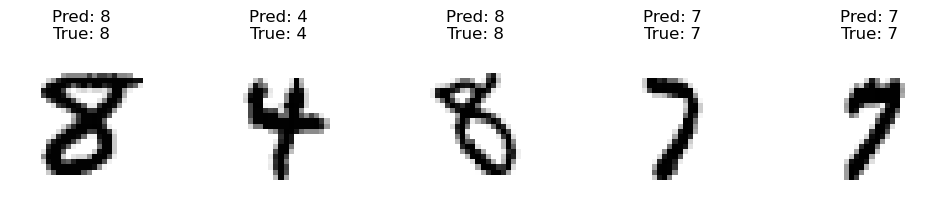

In [34]:
# Visualize sample predictions
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="binary")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()